In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Sonit Samal\Desktop\Datasets\House Sale Prediction\train.csv')
#To view only the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
#Learning about the statistics of 'Sales Price'
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

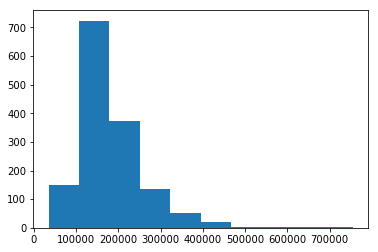

In [4]:
#Plotting Histogram to understand the basic distribution

import matplotlib.pyplot as plt
#Plotting the histogram
plt.hist(df['SalePrice'])
plt.show()

In [5]:
#Printing Skewness and kurtosis
print('Skewness = %f' %df['SalePrice'].skew())
print('Kurtosis = %f'%df['SalePrice'].kurt())

Skewness = 1.882876
Kurtosis = 6.536282


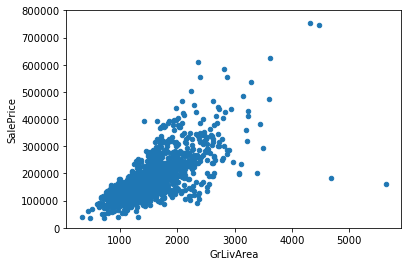

In [6]:
#Get Scatterplots to see the realtionship between predictor and target

%matplotlib inline
data = pd.concat([df['SalePrice'],df['GrLivArea']],axis = 1)
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim = (0,800000));


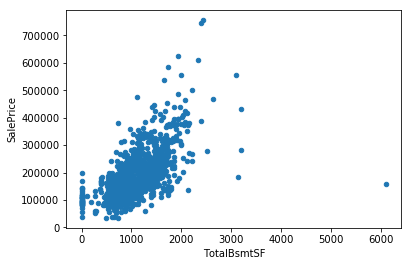

In [7]:
data = pd.concat([df['TotalBsmtSF'],df['SalePrice']],axis = 1)
data.plot.scatter(x = 'TotalBsmtSF',y= 'SalePrice')

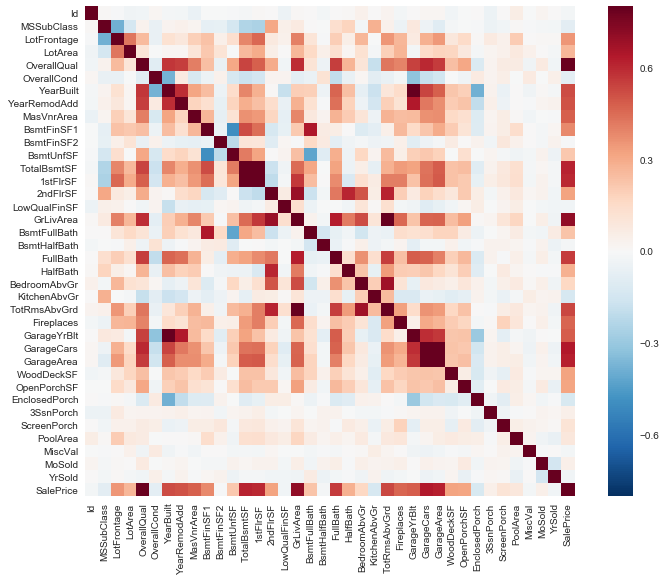

In [8]:
#Plotting of heatmap
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8, square = True)

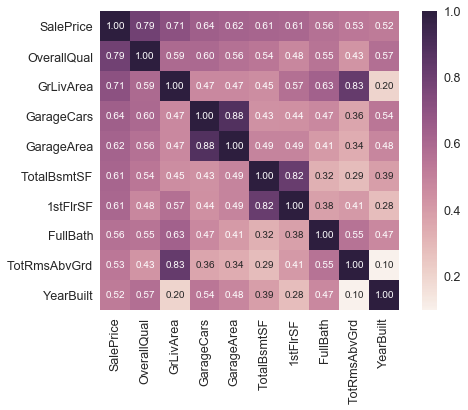

In [9]:
#Plotting of zoomed heatmap
#This helps in determining better correlations

k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot = True,square = True,
                 fmt='.2f',annot_kws={'size':10}, 
                 xticklabels = cols.values,yticklabels = cols.values)
plt.show()


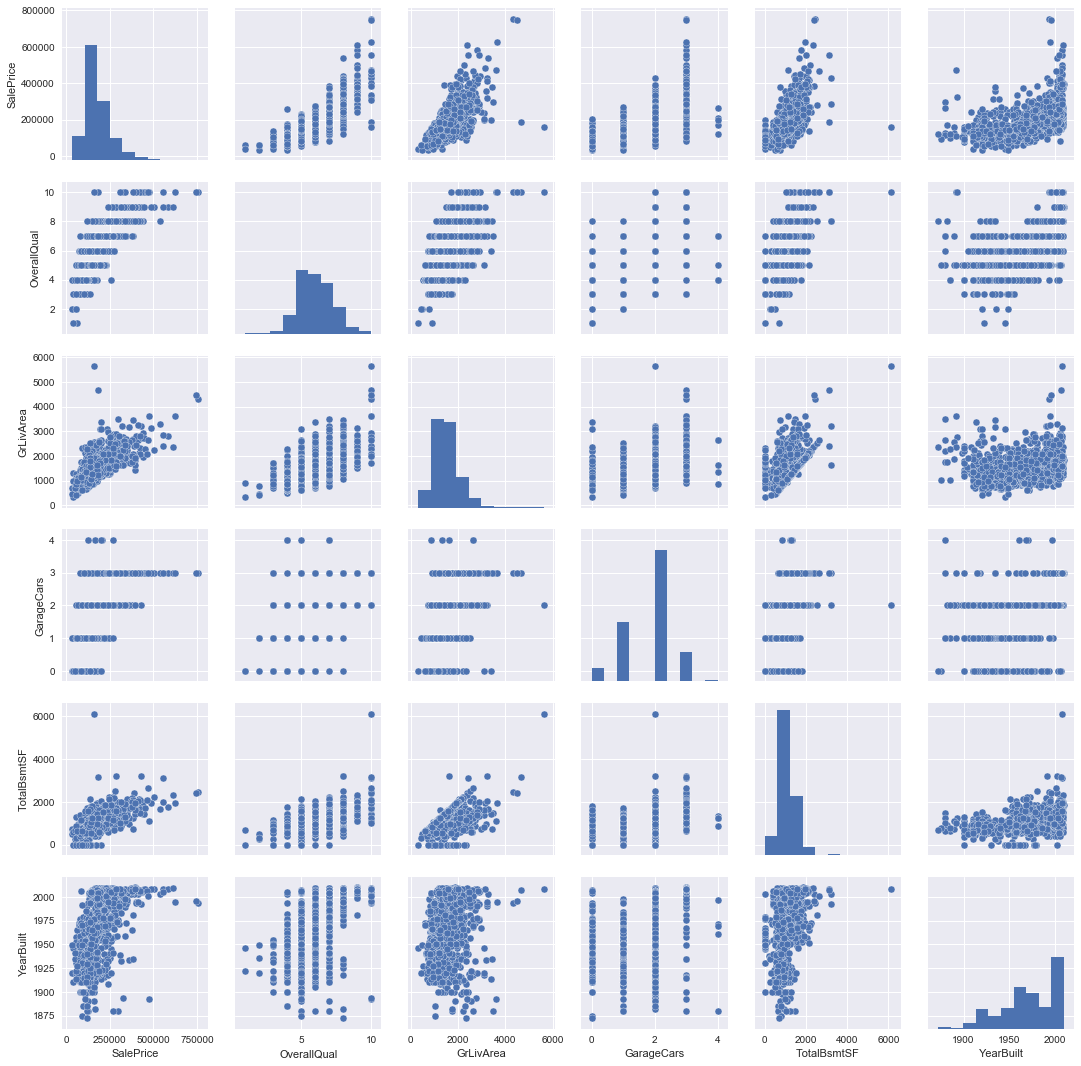

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea',
        'GarageCars','TotalBsmtSF','YearBuilt']
sns.pairplot(df[cols],size = 2.5)
plt.show()

In [11]:
#Missing Data
#To determine missing data we will get the 
#sum total of the columns having null values

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total,percent],axis = 1, keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
#Removing the missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
#After dropping the values, check whether NaN values still exist or not
df.isnull().sum().max()

0

In [39]:
#We have to apply multiple linear regression 
import statsmodels.api as sm

X = pd.concat([df['OverallQual'],df['GrLivArea']],axis=1)
Y = df['SalePrice']

model = sm.OLS(Y,X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:05:48   Log-Likelihood:                -17805.
No. Observations:                1459   AIC:                         3.561e+04
Df Residuals:                    1457   BIC:                         3.562e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual   1.76e+04    764.566     23.026      0.000    1.61e+04    1.91e+04
GrLivArea      51.8655      2.981     17.397      0.000      46.017      57.714
==============================================================================
Omnibus:                      668.622   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7712.317
Skew:                           1.826   Prob(JB):                         0.00
Kurtosis:                      13.655   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Test prediction on test data
df_test = pd.read_csv(r'C:\Users\Sonit Samal\Desktop\Datasets\House Sale Prediction\test.csv')
df_test_prediction = pd.concat([df_test['OverallQual'],df_test['GrLivArea']],axis = 1)
df_test_prediction.head(10)

,OverallQual,GrLivArea
0,5,896
1,6,1329
2,5,1629
3,6,1604
4,8,1280
5,6,1655
6,6,1187
7,6,1465
8,7,1341
9,4,882


In [47]:
#using predict() to determine 
predict = model.predict(df_test_prediction)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:17:46   Log-Likelihood:                -17805.
No. Observations:                1459   AIC:                         3.561e+04
Df Residuals:                    1457   BIC:                         3.562e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual   1.76e+04    764.566     23.026      0.000    1.61e+04    1.91e+04
GrLivArea      51.8655      2.981     17.397      0.000      46.017      57.714
==============================================================================
Omnibus:                      668.622   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7712.317
Skew:                           1.826   Prob(JB):                         0.00
Kurtosis:                      13.655   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
pr_df = pd.DataFrame(predict, columns=['SalePricePredicted'])
result = pd.read_csv(r'C:\Users\Sonit Samal\Desktop\Datasets\House Sale Prediction\sample_submission.csv')
result.head(10)
result = pd.concat([result,pr_df],axis=1)
result.head(10)

,Id,SalePrice,SalePricePredicted
0,1461,169277.052498,134494.726201
1,1462,187758.393989,174557.135798
2,1463,183583.683570,172512.139022
3,1464,179317.477511,188820.148794
4,1465,150730.079977,207225.020845
5,1466,177150.989247,191465.289386
6,1467,172070.659229,167192.234542
7,1468,175110.956520,181610.844043
8,1469,162011.698832,192784.169137
9,1470,160726.247831,116163.961858
